In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import numpy as np
import os

In [3]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join(r"C:\Users\asus\OneDrive - SRM Institute of Science & Technology\Desktop\Brain_Tumor\Training",i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join(r"C:\Users\asus\OneDrive - SRM Institute of Science & Technology\Desktop\Brain_Tumor\Testing",i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [4]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [6]:
Y_train[0:3]

array(['no_tumor', 'pituitary_tumor', 'no_tumor'], dtype='<U16')

In [7]:
y_train

array(['glioma_tumor', 'meningioma_tumor', 'meningioma_tumor', ...,
       'meningioma_tumor', 'pituitary_tumor', 'meningioma_tumor'],
      dtype='<U16')

In [8]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [9]:
y_train

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [10]:
y_train_new

[0,
 1,
 1,
 0,
 3,
 1,
 3,
 1,
 1,
 2,
 2,
 0,
 3,
 2,
 1,
 3,
 1,
 0,
 1,
 2,
 1,
 3,
 3,
 2,
 0,
 0,
 0,
 1,
 2,
 3,
 3,
 0,
 3,
 3,
 1,
 3,
 1,
 2,
 2,
 2,
 2,
 0,
 3,
 1,
 2,
 1,
 0,
 1,
 3,
 3,
 2,
 0,
 1,
 1,
 1,
 0,
 3,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 3,
 1,
 2,
 3,
 1,
 3,
 3,
 1,
 1,
 1,
 3,
 0,
 1,
 3,
 3,
 0,
 3,
 0,
 3,
 0,
 3,
 2,
 2,
 2,
 1,
 3,
 2,
 1,
 1,
 3,
 1,
 2,
 3,
 3,
 0,
 1,
 0,
 3,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 3,
 1,
 0,
 0,
 3,
 2,
 0,
 2,
 1,
 0,
 0,
 3,
 0,
 3,
 1,
 3,
 1,
 3,
 1,
 1,
 0,
 1,
 0,
 2,
 2,
 3,
 0,
 1,
 0,
 1,
 2,
 0,
 3,
 0,
 0,
 1,
 1,
 3,
 1,
 2,
 2,
 3,
 1,
 1,
 3,
 2,
 3,
 1,
 2,
 3,
 0,
 0,
 2,
 1,
 1,
 3,
 3,
 3,
 1,
 3,
 0,
 3,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 3,
 2,
 1,
 3,
 3,
 1,
 3,
 0,
 1,
 1,
 0,
 1,
 2,
 2,
 3,
 2,
 2,
 0,
 3,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 1,
 3,
 0,
 1,
 0,
 3,
 3,
 3,
 0,
 1,
 3,
 0,
 1,
 1,
 0,
 2,
 0,
 1,
 2,
 2,
 1,
 0,
 0,
 0,
 2,
 3,
 1,
 3,
 3,
 3,
 0,
 0,
 2,
 2,
 1,
 3,
 2,
 1,


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input

# Define the model using Input as the first layer
model = Sequential()

# Add an Input layer to define the shape of the input data
model.add(Input(shape=(150, 150, 3)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))



In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [14]:
X_train.shape

(2937, 150, 150, 3)

In [15]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.2980 - loss: 2.8116 - val_accuracy: 0.4184 - val_loss: 1.3218
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.4657 - loss: 1.2077 - val_accuracy: 0.5408 - val_loss: 1.0873
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.5953 - loss: 0.9737 - val_accuracy: 0.5986 - val_loss: 0.9113
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.6420 - loss: 0.8471 - val_accuracy: 0.6633 - val_loss: 0.8193
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.7247 - loss: 0.7004 - val_accuracy: 0.6633 - val_loss: 0.8283
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.7193 - loss: 0.6503 - val_accuracy: 0.6667 - val_loss: 0.8172
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.7770 - loss: 0.5441 - val_accuracy: 0.7653 - val_loss: 0.6072
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.8017 - loss: 0.4960 - val_accuracy: 0.7755 - v

In [16]:
y_pred = model.predict(X_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 617ms/step


In [17]:
scores = model.evaluate(X_test,y_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 421ms/step - accuracy: 0.8759 - loss: 0.3293


In [18]:
scores = model.evaluate(X_train, y_train,verbose=1)

92/92 ━━━━━━━━━━━━━━━━━━━━ 42s 462ms/step - accuracy: 0.9793 - loss: 0.0791


In [19]:
model

<Sequential name=sequential, built=True>

In [20]:
# Save the model in TensorFlow SavedModel format
model.save('ellipse_model.keras')


In [21]:
model.save_weights('.weights.h5')

In [22]:
model.save('saved.h5')

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

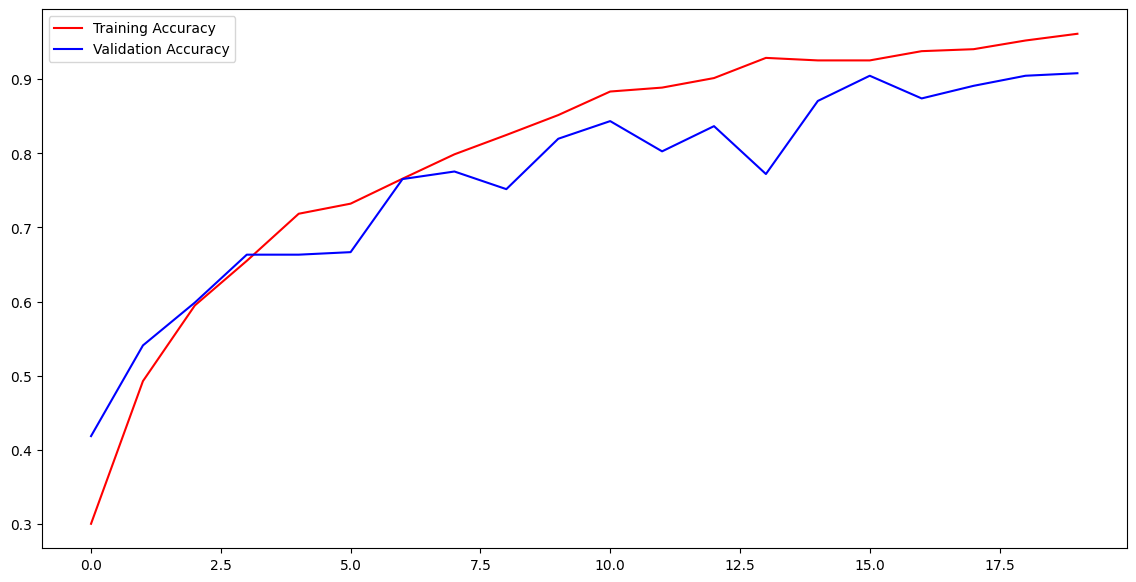

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

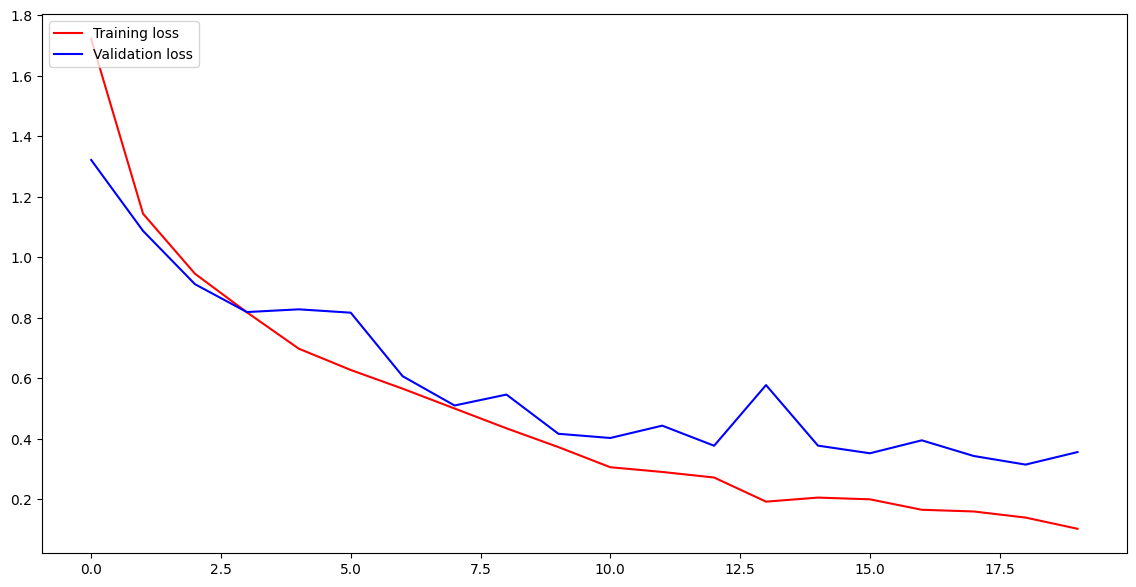

In [25]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [26]:
img = cv2.imread(r"Testing/glioma_tumor/image(2).jpg")
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [27]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

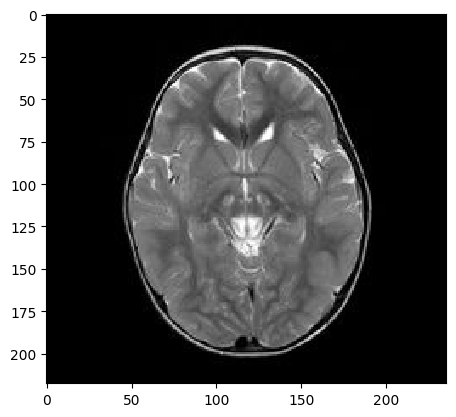

In [28]:
from tensorflow.keras.preprocessing import image
img = image.load_img(r"C:\Users\asus\OneDrive - SRM Institute of Science & Technology\Desktop\Brain_Tumor\Testing\no_tumor\image(2).jpg")
plt.imshow(img,interpolation='nearest')
plt.show()

In [29]:
a=model.predict(img_array)
indices = a.argmax()
indices



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


1

In [30]:
model.save('model.h5')

In [31]:
model.save('Brain_Tumor.keras')

In [32]:
model

<Sequential name=sequential, built=True>

In [33]:
import pickle

In [34]:
pickle.dump(model , open("model.pkl" , "wb"))

model = pickle.load(open("model.pkl", "rb"))

c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 26 variables whereas the saved optimizer has 50 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [35]:
# img_path = r"C:\Users\asus\OneDrive - SRM Institute of Science & Technology\Desktop\Brain_Tumor\Testing\no_tumor\image(2).jpg"
# img = cv2.imread(img_path)
# plt.imshow(img)


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def predict_and_display_tumor(model, img_path, class_names):
    # Load and preprocess the image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img_resized = cv2.resize(img, (150, 150))
    img_array = np.array(img_resized)
    img_array = img_array.reshape(1, 150, 150, 3)

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])
    predicted_class = class_names[predicted_class_index]
    confidence = round(100 * np.max(predictions[0]), 2)

    # Determine actual class from the image path
    if "glioma_tumor" in img_path:
        actual_class = "Glioma Tumor"
    elif "no_tumor" in img_path:
        actual_class = "No Tumor"
    elif "meningioma_tumor" in img_path:
        actual_class = "Meningioma Tumor"
    elif "pituitary_tumor" in img_path:
        actual_class = "Pituitary Tumor"
    else:
        actual_class = "Unknown"

    # Display the image and prediction
    plt.figure(figsize=(5, 7))
    plt.imshow(img)
    plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence}%")
    plt.axis('off')
    plt.show()

    return predicted_class, confidence, actual_class



In [2]:
from tensorflow.keras.models import load_model

# Load the entire model (architecture + weights)
model_path = r'C:\Users\asus\OneDrive - SRM Institute of Science & Technology\Desktop\Healthathon\Brain_Tumor\model_brain_tumor.h5'
model = load_model(model_path)

# Your classes
class_names = ['Glioma Tumor', 'Meningioma Tumor','No_Tumor', 'Pituitary Tumor']

# Predict on a new image
img_path = r"C:\Users\asus\OneDrive - SRM Institute of Science & Technology\Desktop\Healthathon\Brain_Tumor\Testing\meningioma_tumor\image(2).jpg"
predicted_class, confidence, actual_class = predict_and_display_tumor(model, img_path, class_names)

print(f"Predicted class: {predicted_class}")
print(f"Confidence: {confidence}%")
print(f"Actual class: {actual_class}")


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'C:\Users\asus\OneDrive - SRM Institute of Science & Technology\Desktop\Brain_Tumor\model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)